In [53]:
import matplotlib.pyplot as plt
import numpy as np

In [114]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=10000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.y = None

    def fit(self, X, y):
        """ Fit the data. """
        n_features = X.shape[1]

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Can only fit 2 classes, so make these binary
        self.y = y.astype(bool)

        for _ in range(self.n_iters):
            self._update_parameters(X)
            
    def _update_parameters(self, X):
        """ Updates the weights and bias. """
        linear_output = self._calculate_linear_output(X)
        y_predicted = self._apply_step_func(linear_output)

        update = self.lr * (self.y - y_predicted)

        # Calculate the gradients of the weights and bias
        dw = X.T.dot(update)
        db = update.sum() 

        self.weights += dw*self.lr / X.shape[1]
        self.bias += db*self.lr / X.shape[1]
        
    def predict(self, X):
        """ Predicts the values of X. """
        linear_output = self._calculate_linear_output(X)
        return self._apply_step_func(linear_output)
        
    def _calculate_linear_output(self, X):
        """ Calculates the values of X when multiplied by the weights 
        and adding the bias. """
        return X.dot(self.weights) + self.bias

    def _apply_step_func(self, x):
        """ Turns data into binary; if the data (x) is on or above 
        the line return class 1, it's below the line return class 0. 
        """
        return np.where(x>=0, 1, 0)

In [107]:
# Arbitrary function to split the toy data into separate classes

def stepFunction(x):
    return 1 * x + 3

# Generate random 2D coordinates
coords = np.random.rand(100, 2) * 10
Y = (stepFunction(coords[:, 0]) > coords[:, 1]).astype(int)

In [108]:
p = Perceptron()
p.fit(coords, Y)
p.weights, p.bias

(array([ 0.00626716, -0.0057352 ]), 0.015499999999999984)

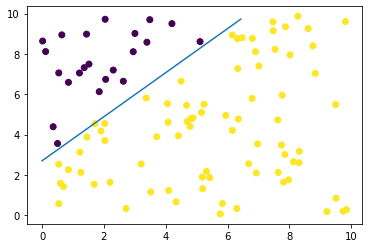

In [113]:
plt.scatter(*coords.T, c=Y)

m = -p.weights[0]/p.weights[1]
c = -p.bias/p.weights[1]

x=np.linspace(0, coords[:,0].max(), 50)

y = m * x + c

x = x[y <= coords[:,1].max()]
y = y[y <= coords[:,1].max()]

plt.plot(x,y)